In [14]:
from dateutil.parser import parse
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
# Import as Dataframe
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col = ['date'])
data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [16]:
data.shape

(204, 1)

In [17]:
data.isnull().sum()

value    0
dtype: int64

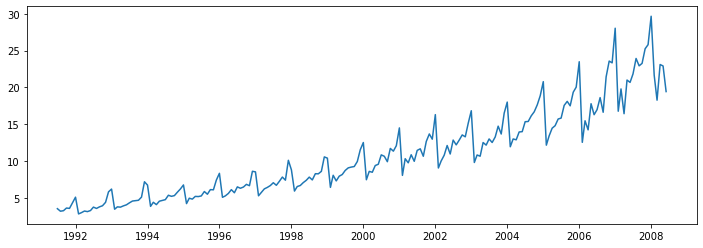

In [22]:
plt.figure(figsize = (12, 4))
plt.plot(data['value'])

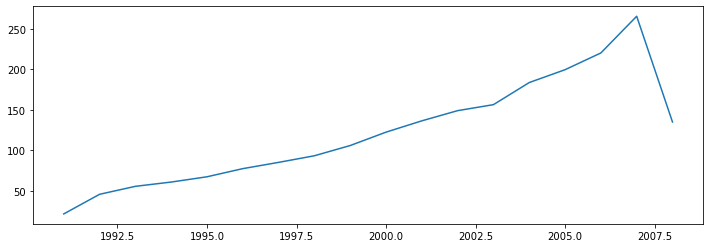

In [39]:
plt.figure(figsize = (12, 4))
plt.plot(data.groupby(data.index.year)['value'].sum())

In [32]:
df = pd.DataFrame()
df['year'] = [d for d in data.index.year]
df.head()

,year
0,1991
1,1991
2,1991
3,1991
4,1991


In [33]:
df['month'] = [m for m in data.index.month]
df.head()

,year,month
0,1991,7
1,1991,8
2,1991,9
3,1991,10
4,1991,11


In [36]:
df['values'] = data['value'].values
df.head()

,year,month,values
0,1991,7,3.526591
1,1991,8,3.180891
2,1991,9,3.252221
3,1991,10,3.611003
4,1991,11,3.565869


### Year Wise Boxplot

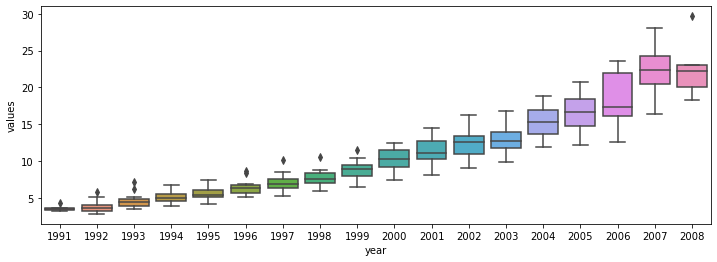

In [40]:
plt.figure(figsize = (12, 4))
sns.boxplot(y = df['values'], x = df['year'] )

### Month Wise Boxplot

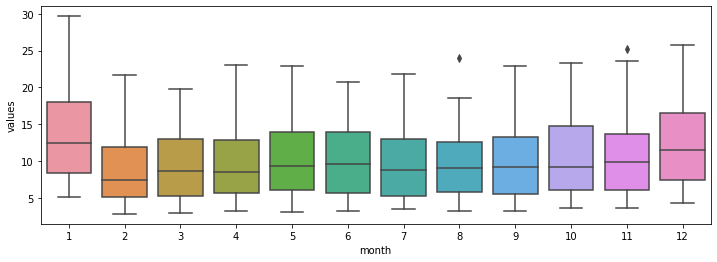

In [41]:
plt.figure(figsize = (12, 4))
sns.boxplot(y = df['values'], x = df['month'] )

### Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

## How to  Decompose a time series into its components

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [52]:
result_mul = seasonal_decompose(data['value'], model = 'multiplicative', extrapolate_trend = 'freq')


In [53]:
# Additive Decomposition
result_add = seasonal_decompose(data['value'], model='additive', extrapolate_trend='freq')
#Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the series.

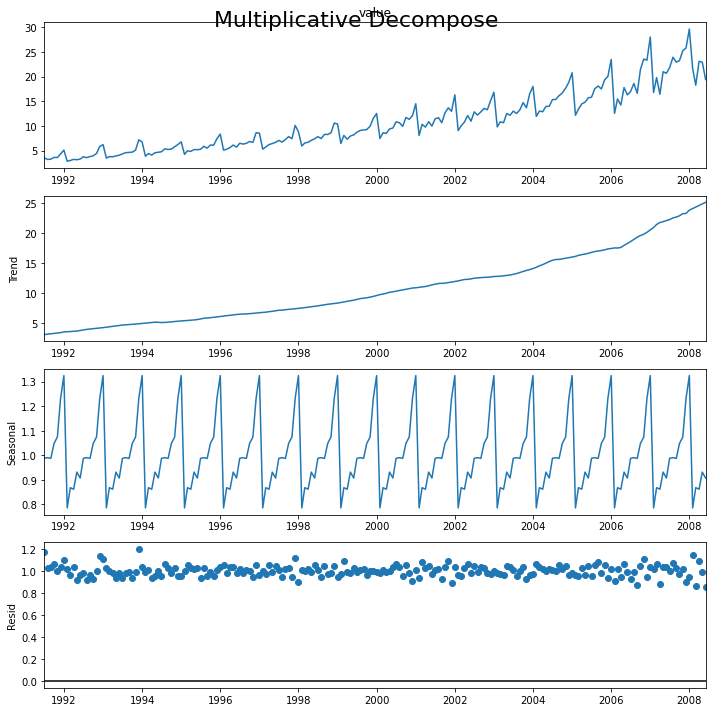

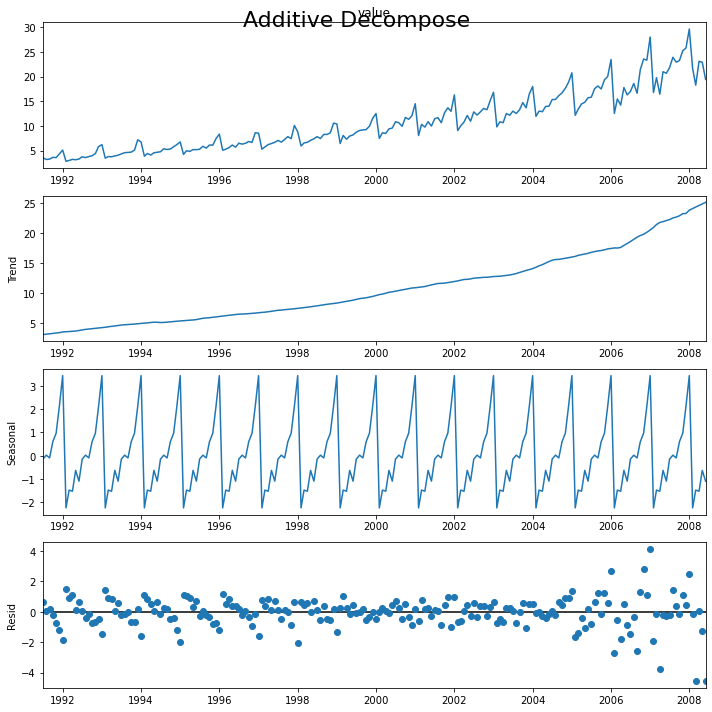

In [55]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## How to make a time series stationary

Differencing the Series (once or more)

Take the log of the series

Take the nth root of the series

Combination of the above

`If Y_t is the value at time ‘t’, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.`

`If the first difference doesn’t make a series stationary, you can go for the second differencing. And so on.`

## Stationarity Test

In [58]:
from statsmodels.tsa.stattools import adfuller, kpss

In [62]:
# ADF Test
adf_test = adfuller(data['value'] , autolag='AIC')
adf_test[4]['5%']

-2.8770397560752436

In [69]:
print("p value", adf_test[1])

p value 1.0


In [ ]:
# So p value is > 0.05 so the series is not Stationary

In [64]:
# KPSS Test
kpss_test = kpss(data['value'], regression='c')
kpss_test[3]['5%']

C:\My_Programs\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


0.463

In [71]:
print('p value', kpss_test[1])

p value 0.01


In [ ]:
# So the p value is less than 0.05 so the Series is not Stationary

## Detrending a Time Series

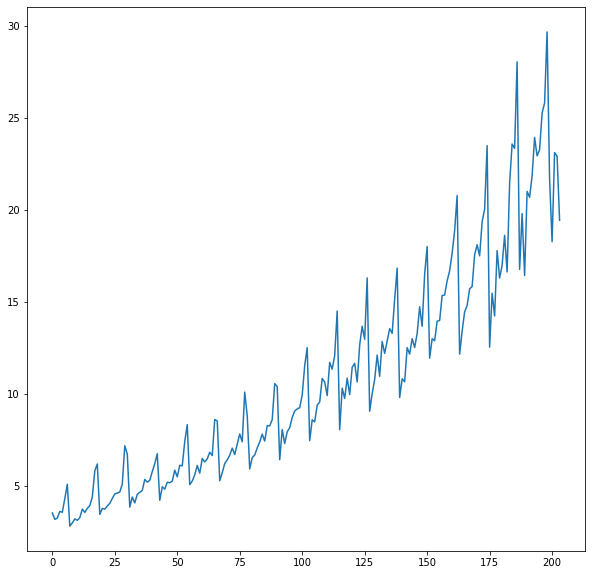

In [73]:
# Using scipy: Subtract the line of best fit
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(df.value)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

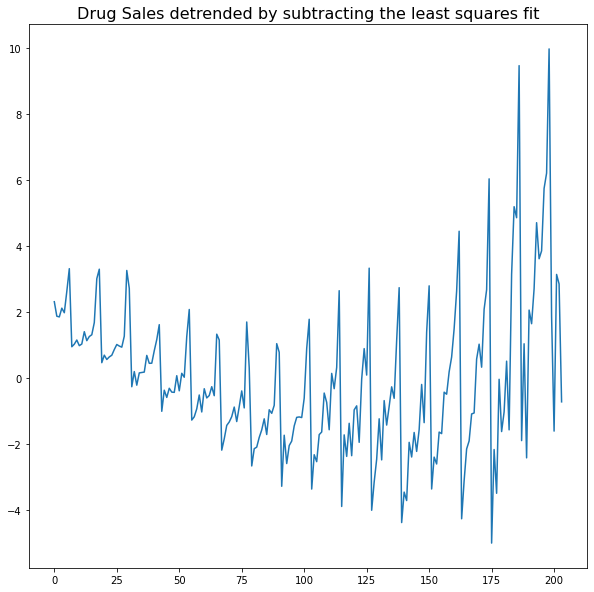

In [72]:
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

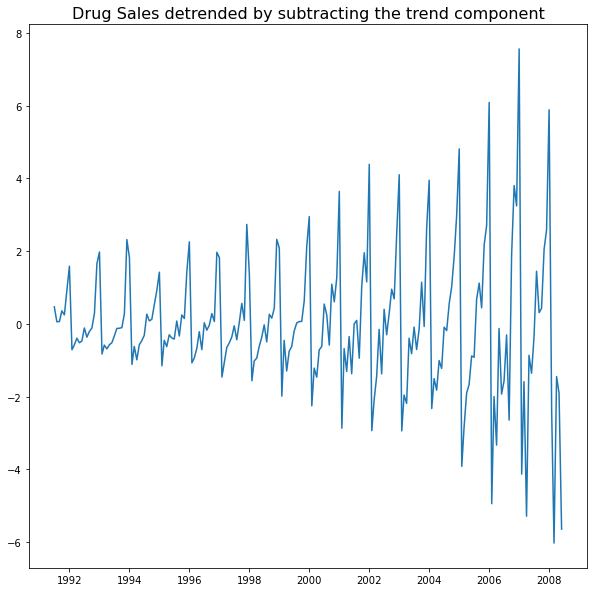

In [74]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

detrended = df.value.values - result_mul.trend

plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

## Deseasonalizing Time Series

[]

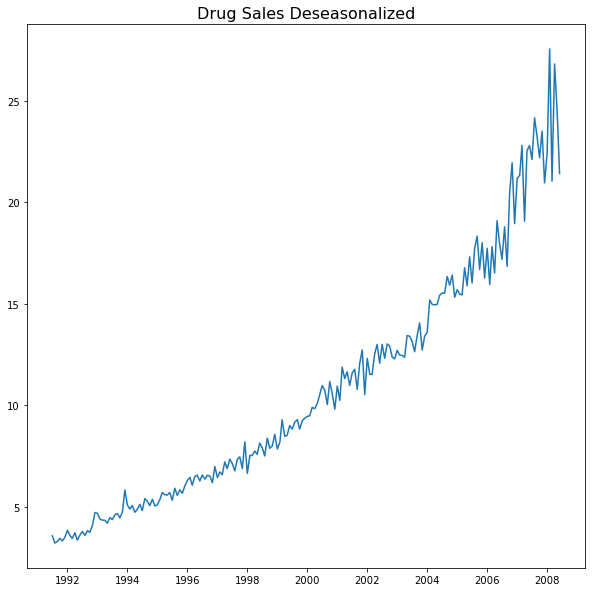

In [75]:
# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

## ACF and PACF Plots

In [76]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

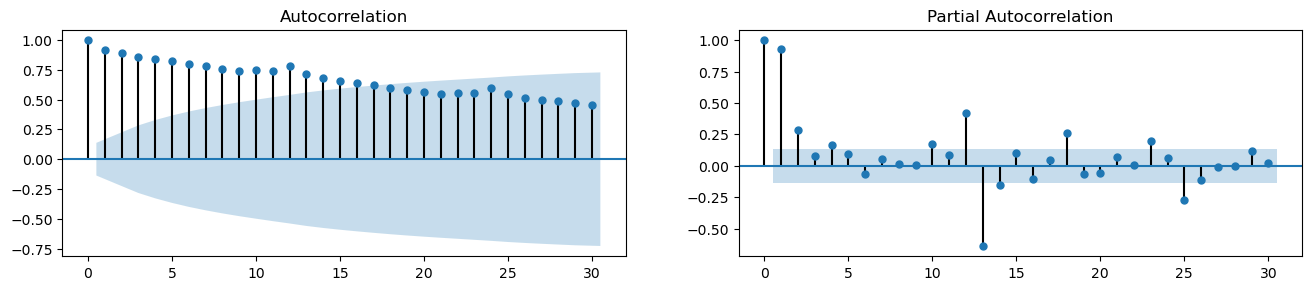

In [85]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)

plot_acf(df['value'], lags = 30, ax=axes[0])
plot_pacf(df['value'], lags = 30, ax=axes[1])
plt.show()